In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/housing/target.csv
/kaggle/input/housing/train.csv
/kaggle/input/housing/test.csv
/kaggle/input/housing/AmesHousing.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [3]:
data_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
data_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
data_ames_train = pd.read_csv("/kaggle/input/housing/train.csv")
data_ames = pd.read_csv("/kaggle/input/housing/AmesHousing.csv")
data_ames_test = pd.read_csv("/kaggle/input/housing/test.csv")


In [5]:
data_ames_train = data_ames_train.drop(['Order', 'PID'], axis = 1)
data_train = data_train.drop(['Id'], axis = 1)

In [6]:
print(data_ames.shape)
print(data_ames_train.shape)
print(data_ames_test.shape)

(2930, 82)
(2197, 80)
(733, 81)


In [7]:
data_ames_train.columns = data_ames_train.columns.str.replace(' ', '')
print(data_train.columns)
data_ames_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'W

In [8]:
print(data_test.shape)
print(data_train.shape)

(1459, 80)
(1460, 80)


In [9]:
data_ames_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,60,RL,80.0,10041,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,220000
2193,50,RH,70.0,6300,Pave,Pave,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Abnorml,160000
2194,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000
2195,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [10]:
frames = [data_train, data_ames_train]

data_train = pd.concat(frames)
print(data_train.shape)

(3657, 81)


In [11]:
data_train  = data_train.drop(['YearRemod/Add'], axis = 1)
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [12]:
num_cols = data_train._get_numeric_data().columns
cor_matrix = data_train[num_cols].corr().abs()
#print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [13]:
data_train = data_train.drop(['Alley', "MiscFeature", "Fence", "PoolQC"], axis = 1)
cols = data_train.columns
num_cols = data_train._get_numeric_data().columns
cats = list(set(cols) - set(num_cols))
print(cats)

['Condition1', 'KitchenQual', 'LandSlope', 'LotConfig', 'ExterQual', 'GarageCond', 'RoofMatl', 'BsmtCond', 'HeatingQC', 'Condition2', 'PavedDrive', 'BsmtExposure', 'MasVnrType', 'Heating', 'BldgType', 'Neighborhood', 'SaleType', 'SaleCondition', 'CentralAir', 'GarageFinish', 'Electrical', 'BsmtFinType1', 'BsmtQual', 'LandContour', 'FireplaceQu', 'GarageQual', 'ExterCond', 'Functional', 'MSZoning', 'BsmtFinType2', 'Exterior1st', 'Foundation', 'Exterior2nd', 'RoofStyle', 'Utilities', 'HouseStyle', 'LotShape', 'GarageType', 'Street']


In [14]:
for i in cats:
    print(i, data_train[i].isna().sum())
# Alley, MiscFeature, Fence, PoolQC

Condition1 0
KitchenQual 0
LandSlope 0
LotConfig 0
ExterQual 0
GarageCond 203
RoofMatl 0
BsmtCond 104
HeatingQC 0
Condition2 0
PavedDrive 0
BsmtExposure 107
MasVnrType 30
Heating 0
BldgType 0
Neighborhood 0
SaleType 0
SaleCondition 0
CentralAir 0
GarageFinish 203
Electrical 2
BsmtFinType1 104
BsmtQual 104
LandContour 0
FireplaceQu 1756
GarageQual 203
ExterCond 0
Functional 0
MSZoning 0
BsmtFinType2 106
Exterior1st 0
Foundation 0
Exterior2nd 0
RoofStyle 0
Utilities 0
HouseStyle 0
LotShape 0
GarageType 201
Street 0


In [15]:
for i in data_train.columns:
    if i in cats:
        data_train[i] = data_train[i].fillna(data_train[i].mode()[0])
    else:
        data_train[i] = data_train[i].fillna(data_train[i].median())

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split



X = data_train.copy()
print(X.shape)
#X=X[:,~np.all(np.isnan(d), axis=0)]
# Remove target
y = X.pop('SalePrice')

cols = X.columns
num_cols = X._get_numeric_data().columns
cats = list(set(cols) - set(num_cols))
print(list(set(cols) - set(num_cols)))

print(X.shape)

features_num = num_cols
features_cat = cats

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

(3657, 76)
['Condition1', 'KitchenQual', 'LandSlope', 'LotConfig', 'ExterQual', 'GarageCond', 'RoofMatl', 'BsmtCond', 'HeatingQC', 'Condition2', 'PavedDrive', 'BsmtExposure', 'MasVnrType', 'Heating', 'BldgType', 'Neighborhood', 'SaleType', 'SaleCondition', 'CentralAir', 'GarageFinish', 'Electrical', 'BsmtFinType1', 'BsmtQual', 'LandContour', 'FireplaceQu', 'GarageQual', 'ExterCond', 'Functional', 'MSZoning', 'BsmtFinType2', 'Exterior1st', 'Foundation', 'Exterior2nd', 'RoofStyle', 'Utilities', 'HouseStyle', 'LotShape', 'GarageType', 'Street']
(3657, 75)
Input shape: [290]


In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state = 1)

In [18]:
input_shape = [X_train.shape[1]]
print(input_shape, X_train.shape, X_valid.shape, len(y_train), len(y_valid))

[290] (3291, 290) (366, 290) 3291 366


In [19]:
X_train = X_train.toarray()
X_valid = X_valid.toarray()

In [20]:

model = keras.Sequential([
    layers.Dense(units = 256,activation = "relu", input_shape = input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.3), 
    
    layers.Dense(units = 256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units = 256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units = 256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units = 256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units = 256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units = 256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units = 256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units = 256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(1, activation  = 'linear')
])

2022-02-10 06:44:43.276163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 06:44:43.376174: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 06:44:43.376892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 06:44:43.378003: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [21]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model.compile(optimizer = "adam", loss = root_mean_squared_error, 
              metrics =["accuracy"])

In [22]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.0001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

2022-02-10 06:44:45.726112: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
13/13 [==============================] - 3s 46ms/step - loss: 11.9811 - accuracy: 0.0000e+00 - val_loss: 11.7702 - val_accuracy: 0.0000e+00
Epoch 2/1000
13/13 [==============================] - 0s 13ms/step - loss: 11.7454 - accuracy: 0.0000e+00 - val_loss: 11.5511 - val_accuracy: 0.0000e+00
Epoch 3/1000
13/13 [==============================] - 0s 9ms/step - loss: 11.4401 - accuracy: 0.0000e+00 - val_loss: 11.1971 - val_accuracy: 0.0000e+00
Epoch 4/1000
13/13 [==============================] - 0s 10ms/step - loss: 11.0562 - accuracy: 0.0000e+00 - val_loss: 10.8264 - val_accuracy: 0.0000e+00
Epoch 5/1000
13/13 [==============================] - 0s 9ms/step - loss: 10.6236 - accuracy: 0.0000e+00 - val_loss: 10.3197 - val_accuracy: 0.0000e+00
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 10.0411 - accuracy: 0.0000e+00 - val_loss: 9.5877 - val_accuracy: 0.0000e+00
Epoch 7/1000
13/13 [==============================] - 0s 10ms/step - loss: 9.2856 - a

<AxesSubplot:>

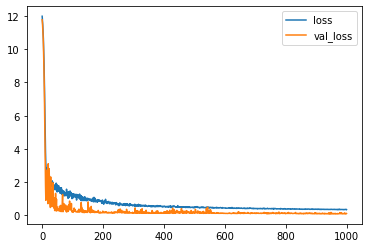

In [23]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[0:, ['loss', 'val_loss']].plot()
#history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

#print(("Best Validation Loss: {:0.4f}" +\
 #     "\nBest Validation Accuracy: {:0.4f}")\
  #    .format(history_df['val_loss'].min(), 
   #           history_df['val_binary_accuracy'].max()))

In [24]:
data_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
data_test = data_test.drop(['Id', 'Alley', "MiscFeature", "Fence", "PoolQC"], axis = 1)
cols = data_test.columns
num_cols = data_test._get_numeric_data().columns
cats = list(set(cols) - set(num_cols))
print(cats)

['Condition1', 'KitchenQual', 'LandSlope', 'LotConfig', 'ExterQual', 'GarageCond', 'RoofMatl', 'BsmtCond', 'HeatingQC', 'Condition2', 'PavedDrive', 'BsmtExposure', 'MasVnrType', 'Heating', 'BldgType', 'Neighborhood', 'SaleType', 'SaleCondition', 'CentralAir', 'GarageFinish', 'Electrical', 'BsmtFinType1', 'BsmtQual', 'LandContour', 'FireplaceQu', 'GarageQual', 'ExterCond', 'Functional', 'MSZoning', 'BsmtFinType2', 'Exterior1st', 'Foundation', 'Exterior2nd', 'RoofStyle', 'Utilities', 'HouseStyle', 'LotShape', 'GarageType', 'Street']


In [26]:
for i in cats:
    print(i, data_test[i].isna().sum())
# Alley, MiscFeature, Fence, PoolQC

Condition1 0
KitchenQual 1
LandSlope 0
LotConfig 0
ExterQual 0
GarageCond 78
RoofMatl 0
BsmtCond 45
HeatingQC 0
Condition2 0
PavedDrive 0
BsmtExposure 44
MasVnrType 16
Heating 0
BldgType 0
Neighborhood 0
SaleType 1
SaleCondition 0
CentralAir 0
GarageFinish 78
Electrical 0
BsmtFinType1 42
BsmtQual 44
LandContour 0
FireplaceQu 730
GarageQual 78
ExterCond 0
Functional 2
MSZoning 4
BsmtFinType2 42
Exterior1st 1
Foundation 0
Exterior2nd 1
RoofStyle 0
Utilities 2
HouseStyle 0
LotShape 0
GarageType 76
Street 0


In [27]:
for i in data_test.columns:
    if i in cats:
        data_test[i] = data_test[i].fillna(data_test[i].mode()[0])
    else:
        data_test[i] = data_test[i].fillna(data_test[i].median())

In [28]:
data_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [29]:
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [30]:
X_test = preprocessor.transform(data_test)

In [31]:
predictions = model.predict(X_test)


In [32]:
np.exp(predictions)

array([[137395.11],
       [ 88982.28],
       [191995.98],
       ...,
       [155896.9 ],
       [137794.67],
       [237902.4 ]], dtype=float32)

In [33]:
predictions = np.exp(predictions)

In [34]:
sample = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [35]:
sample.shape

(1459, 2)

In [36]:
sample.columns

Index(['Id', 'SalePrice'], dtype='object')

In [37]:
sample['SalePrice'] = predictions

In [38]:
sample.to_csv('submission.csv', index = False)